# NUMERICAL SIMULATIONS AND METHODS

*Week 1*

## Numerical Solutions to Differenctial Equations

A differential equation is an equation involving an unknown function $y(t)$ and its derivatives $y^\prime, y{\prime\prime}, ..., y^{(n)}$. The order of a differential equation is the highest order derivative of $y(t)$ appearing in the equation.

There are methods to solve differential equations however most differential equations cannot be solved explicitly with elementary functions. We can always use graphical methods and numerical methods to approximate solutions of any differential equation.

A numerical method is an algorithm which approximates the solution $y(t)$. Given a sequence of values $t_1, t_2, t_3, ..., t_n$, a numerical method computes a sequence of $y_1, y_2, y_3, ..., y_n$ which approximates the solution at the given $t$ values:
\begin{equation}
y_n \approx y(t_n)
\end{equation}

The $t$ values are usually chosen to be equally spaced with step size $h$, in the form:
\begin{equation}
t_n = t_0 + nh
\end{equation}


## Euler's Method

Euler's method is a simple and single step numerical method where we obtain solutions in the tabular/discretized form.

Consider the following initial-value problem ODE
\begin{equation}
\frac{\partial y}{\partial t} = F(t, y), \,\,\,\, y(0) = y_0
\end{equation}

The derivative is defined as:
\begin{equation}
\frac{\partial y}{\partial t}(t) = \lim_{h\to0} \frac{y(t + h) - y(t)}{h}
\end{equation}

which can be discretized; replacing the limit with a finite difference as:
\begin{equation}
\frac{\partial y}{\partial t}(t) \approx \frac{y(t+\Delta t) - y(t)}{\Delta t}
\end{equation}

Thus, using the Euler Method, the ODE $\frac{\partial y}{\partial t}(t) = F(t, y)$ is replaced by the approximation:
\begin{equation}
\frac{y_{n+1} - y_n}{\Delta t} = f(t_n, y_n), \,\,\,\, y(0) = y_0
\end{equation}

which can then be written as:
\begin{equation}
y_{n+1} = y_n + \Delta t f(t_n, y_n)
\end{equation}



To implement the Euler Method, set $y(0) = y_0$ to the given initial data; thenn $y_1$ is obtained using:
\begin{equation}
y_1 = y_0 + \Delta t f(t_0, y_0)
\end{equation}
Knowing $y_1$ we can compute the value of $y_n$ in a similar fashion. The formula for Euler's method defines a recursive sequence.


In subsequent sections we will consider the simple and familiar differential equation
\begin{equation}
\frac{\partial y}{\partial t} = e^t
\end{equation}
Such that $y^\prime = e^t, \,\,\,\, y(0) = 1$; whose solution, $y(t)$ is $y(t) = e^t$. At $t = 1$, we have $y(1) \approx 2.718$

In [78]:
from math import exp
from typing import Callable


def euler(func: Callable, y_init: float, t_init: float, t_finl: float, n: int) -> float:
    """
    Computes the approximation of the initial value ODE problems.

    :param func: callable function representing the first order differential equation;
    :param y_init: initial value of the dependent variable y(t) at time t = 0 i.e. y(t = 0);
    :param t_init: initial value of independent variable, usually time, t;
    :param t_finl: final value of the independent variable;
    :param n: compute iterations. Number of steps to take between the initial and final independent variables;
    :return: float of the approximate value of the function at point b
    """
    # step size
    h: float = (t_finl - t_init) / n
    t: float = t_init
    y: float = y_init

    while t < t_finl:
        y += h * func(y, t)
        t += h

    return y

def f(y: float, b: float) -> float:
    """
    Function under consideration i.e. F(b, y) = y' = e**t
    """
    return y

t_init = 0.0
t_finl = 1.0
y_init = 1.0
n: int = int(input("n (steps): "))

y_euler = euler(f, y_init, t_init, t_finl, n)
print("Euler: \t %.16f"%(y_euler))

n (steps):  100


Euler: 	 2.7048138294215258


## Runge-Kutta Methods

We seek to improve on the Euler method. This is done by making use of additional slopes.

Instead of a single slope at $(t_n, y_n)$, we use the slope at both $(t_n, y_n)$ and $(t_n + \frac{1}{2}h, y_n + \frac{1}{2}h)$ to approximate $y_{n+1}$.

\begin{equation}
y_{n+\frac{1}{2}} = y_n + \frac{h}{2}f(t_n, y_n)
\end{equation}

and
\begin{equation}
y_{n+1} \approx y_{n+\frac{1}{2}} + \frac{h}{2}f(t_{n+\frac{1}{2}}, y_{n+\frac{1}{2}})
\end{equation}

but
\begin{equation}
t_{n+\frac{1}{2}} = t_n + \frac{h}{2}
\end{equation}

We can the explicitly write the formula for estimating $y_{n+1}$ as:
\begin{align}
k_1 =& f(t_n, t_n) \\
k_2 =& f(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_1) \\
\end{align}

We can establish the **Second-Order Runge-Kutta** method as:
\begin{equation}
y_{n+1} \approx y_n + h \cdot k_2
\end{equation}

Extending from the Second-Order Runge-Kutta and we get the **Fourth-Order Runge-Kutta** method is expressed as:
\begin{equation}
y_{n+1} \approx y_n + \frac{h}{6} \cdot (k_1 + 2k_2 + 2k_3 + k_4)
\end{equation}
where:
\begin{align}
k_1 =& f(t_n, t_n) \\
k_2 =& f(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_1) \\
k_3 =& f(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_2) \\
k_4 =& f(t_n + h, y_n + h \cdot k_3)
\end{align}

In [79]:
from math import exp
from typing import Callable


def rk4(func: Callable, y_init: float, t_init: float, t_finl: float, n: float) -> float:
    """
    Implements the fourth-order Runge-Kutta (RK4) to solve first order ordinary differential equations.

    :param func: callable function representing the first order differential equation;
    :param y_init: initial value of the dependent variable y(t) at time t = 0 i.e. y(t = 0);
    :param t_init: initial value of independent variable, usually time, t;
    :param t_finl: final value of the independent variable;
    :param n: compute iterations. Number of steps to take between the initial and final independent variables;
    :return: float of the approximate value of the function at point t
    """

    h: float = (t_finl - t_init) / n
    t: float = t_init
    y: float = y_init

    while t < t_finl:
        # calculate the intermediate values
        k1 = func(y, t)
        k2 = func( y + 0.5 * h * k1, t + 0.5 * h )
        k3 = func( y + 0.5 * h * k2, t + 0.5 * h )
        k4 = func( y + h * k3, t + h )

        y += ( (h/6) * (k1 + (2*k2) + (2*k3) + k4) )
        t += h

    return y

def f(y: float, b: float) -> float:
    """
    Function under consideration i.e. F(b, y) = y = e**t
    """
    return y

t_init = 0.0
t_finl = 1.0
y_init = 1.0
n: float = int(input("n (steps): "))

y_rk4 = rk4(f, y_init, t_init, t_finl, n)
print("RK4: \t %.16f"%(y_rk4))

n (steps):  100


RK4: 	 2.7182818282344039


## Using `scipy.integrate.odeint`

[2.7182819]


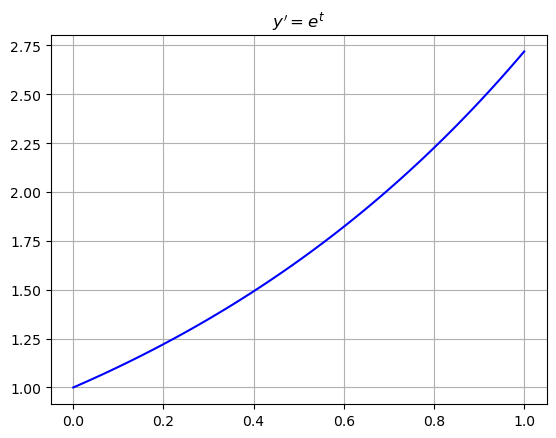

In [80]:
from numpy import ndarray, linspace, exp
import scipy.integrate as spi
import matplotlib.pyplot as plt
    
t: ndarray = linspace(t_init, t_finl, n+1)
y: ndarray = spi.odeint(f, y_init, t)

print(y[-1])

plt.plot(t,y,'b')

plt.grid(True), plt.title("$y^\prime = e^t$")
plt.show()

## Exercise 1

**Problem 1**

**(a)** Write a function called `odeEuler` which takes 3 input parameters `func`, `t_values`, `y_init`, where:
- `func` is a callable function that represents a differential equation;
- `t_values` is a 1D NumPy array containing values within the interval $[a, b]$;
- `y_init` is as initial value $y(t_0) = y_0$ where $t_0$ is the value $t[0]$.

```py
def odeEuler(func: Callable, t_values: NDArray, y_init: float) -> float:
    ### PROCEED WITH YOUR CODE FROM HERE

    return pass
```

**(b)** Consider the following initial value ODE problem:
\begin{equation}
y^\prime - y = 2te^{2t}, \,\,\,\, y(0) = 1
\end{equation}

Use your Euler' method solver `odeEuler` to approximate the value of the function in the interval $[0, 0.2]$ with $\Delta t = 0.02$

**Problem 2**

Use `scipy.integrate.odeint` to approximate $y(1)$ where $y(t)$ is the solution of the equations:
\begin{equation}
y^\prime = t - y^3, \,\,\,\, y(0) = 1
\end{equation}


*Week 2*

## Numerical Solutions to Integral Equations

Generally, we want to obtain the numerical value of an integral $I(a, b)$ defined in the region $[a, b]$:
\begin{equation}
I(a, b) = \int_a^b f(x) dx
\end{equation}

The integral represents the area bound by the function $f(x)$ starting from $x = a$ to $x = b$

To approximate the area, we can divide the region $[a,b]$ into n slices evenly spaced with an interval h, where

\begin{equation}
h = \frac{b-a}{n}
\end{equation}

We lable the data points as $x_i$ with $i = 0,1,...,n$. The integral can then be written as a summation of integrals, with each over an individual slice.

\begin{equation}
\int_a^b f(x) dx = \int_{x_0}^{x_1} f(x) dx + \int_{x_1}^{x_2} f(x) dx + ... + \int_{x_n-1}^{x_n} f(x) dx
\end{equation}

where $x_0 = a$ and $x_n = b$

Therfore, the general integration algorithm approximates the integral $I$ by

\begin{equation}
I = \sum_{i=0}^{n-1} f(x_i) w_i
\end{equation}

The function $f(x)$ is evaluated at $n+1$ points in the interval $[a,b]$, followed by the summation of $f(x_i)$ with their corresponding weights $w_i$.

The approximation algorithms differ by how they approximate the function $f(x)$.

Rectangular and Trapezoid approximation approximate $f(x)$ as a straight line. Simpson's approximation approximates $f(x)$ as a parabola.

### Rectangular approximation

If we approximate $f(x)$ in the region $[x_i, x_{i+1}]$ by a horizontal line through the point $f(x_i)$, we get that the area of the function in the interval is approximated by $h \cdot f(x_i)$

We get the integral as:
\begin{equation}
I \approx h \cdot \sum_{i=0}^{n-1} f(x_i)
\end{equation}

We are summing up the areas of each rectangular slice. This is a very poor approximation. The area under rectangles isn't very close to the area under the curve

![Rectangular](figures/rectangular.png)


**Example:**

You have a velocity function:
\begin{equation}
v(t) = 3t^2 e^{t^3}
\end{equation}

Evaluate the distance travelled in 1 second.

The integral is:
\begin{equation}
s(t) = \int_0^1 3t^2 e^{t^3} dt
\end{equation}

Analytically we get the integral is:
\begin{equation}
s(t) = e^{t^3} - 1 \approx 1.718
\end{equation}

Numerically, we can solve for the integral as follows from the code below:

In [1]:
from math import exp
from typing import Callable


def rectangular(f: Callable, a: float, b: float, n:int) -> float:
    """Function that implements the rectangular approximation algorithm
    Returns the value of the integral (float)
    """
    h: float = float(b - a) / n
    result: float = 0.0

    for i in range(n):
        result = result + f(a + i * h)

    result = result * h
    return result

def v(t: float) -> float:
    """Function f(x) to be integrated"""
    return 3*(t**2)*exp(t**3)

a: float = 0.0
b: float = 1.0
n: int = int(input("n: "))

# Call the rectangular function
integral: float = rectangular(v, a, b, n)

print("Integral = %.16f"%(integral))


n:  100


Integral = 1.6778473641778933


### Trapezoid approximation

We approximate the integral by a sum of trapezoids. The area under the trapezoids is a considerably better approximation to the area under the curve, giving us perfectly adequate results.

In the subinterval $[x_i, x_{i+1}]$, the area of a trapezoidal slice is given by:
\begin{equation}
A_i = h \cdot \frac{ f(x_i) + f(x_{i+1}) }{2}
\end{equation}

![Trapezoid](figures/trapezoid.png)

The integral $I$ is thus:
\begin{align}
I \approx& h\Big[ \frac{ f(x_0) + f(x_1) }{2} + \frac{ f(x_1) + f(x_2) }{2} + ... + \frac{ f(x_{n-1}) + f(x_n) }{2} \Big] \\
\approx& h\Big[ \frac{1}{2}f(x_0) + f(x_1) + f(x_2) + ... + f(x_{n-1}) + \frac{1}{2}f(x_n) \Big] \\
\therefore I \approx& h\Big[ \frac{1}{2}f(x_0) + \frac{1}{2}f(x_n) + \sum_{i=1}^{n-1}f(x_i) \Big]
\end{align}

In [82]:
from math import exp
from typing import Callable


def trapezoid(f: Callable, a: float, b: float, n: int) -> float:
    """Function that implements the trapezoid approximation algorithm
    """
    h: float = float(b - a) / n
    result: float = (0.5 * f(a)) + (0.5 * f(b))

    for i in range(1, n):
        result += f(a +  i*h)

    result *= h
    return result


def v(t: float) -> float:
    """Function f(x) to be integrated"""
    return 3*(t**2)*exp(t**3)

a: float = 0.0
b: float = 1.0
n: int = int(input("n: "))

# Call the trapezoid function
integral: float = trapezoid(v, a, b, n)

print("Integral = %.16f"%(integral))


n:  100


Integral = 1.7186215916047789


#### Using `scipy.integrate.trapezoid`

In [83]:
import numpy as np
import scipy.integrate as spi

x = np.linspace(a, b, n+1)
y = [v(i) for i in x]
T = spi.trapezoid(y, x)
print(T)

1.718621591604779


### Simpson's/Parabolic approximation

Useful for cases where great accuracy is required.

Approximation is done using quadratic curves.

The function $f(x)$ is approximated in the subinterval $[x_n, x_n+1]$ by a parabola of the form:
\begin{equation}
f(x) = \alpha x^2 + \beta x + \gamma
\end{equation}

We require three points to specify a quadratic equation (instead of two for a line) and so fit the equation we use two adjacent slices e.g. using datapoints $-h, 0, +h$,

fitting the quadratic $\alpha x^2 + \beta x + \gamma$ through those three points gives us:

\begin{align}
f(-h) =& \alpha x^2 - \beta h + \gamma \\
f(0) =& \gamma \\
f(h) =& \alpha x^2 + \beta h + \gamma
\end{align}

![Simpson](figures/parabola.png) 

Solving the three equations simultaneously for $\alpha$, $\beta$ and $\gamma$ gives us:
\begin{align}
\alpha =& \frac{1}{h^2} \Big[ \frac{1}{2}f(-h) - f(0) + \frac{1}{2}f(h) \Big] \\
\beta =& \frac{1}{2h} \Big[ f(h) - f(-h) \Big] \\
\gamma =& f(0)
\end{align}

area under the curve from $-h$ to $h$ is approximated by the area under the quadratic,so
\begin{align}
\int_{-h}^{h} (\alpha x^2 + \beta h + \gamma) dx =& \frac{2}{3}\alpha^3 + 2\gamma h \\
&= \frac{1}{3} \Big[ f(-h) - 4 f(0) + f(h) \Big]
\end{align}

This is Simpson's rule. It approximates the area under two adjacent slices.

The approximate value of the integral is then:
\begin{equation}
I \approx \frac{1}{3}h \Big[ f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + ... + 4f(x_{n-3}) + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \Big]
\end{equation}

\begin{equation}
I \approx \frac{1}{3}h \Big[ f(x_0) + f(x_n) + 4 \sum^{n-1}_{k \,\, odd, i = 1}f(x_i) + 2 \sum^{n-2}_{k \,\, even, i = 2}f(x_i) \Big]
\end{equation}

In [84]:
from math import exp
from typing import Callable
from timeit import default_timer as timer


def simpsons(f: Callable, a: float, b: float, n: int) -> float:
    """
    Function the implements simpsons approximation algorithm
    a: interval start
    b: interval end
    n: number of steps
    return: numerical integral evaluation
    """
    h: float = float(b - a) / n
    result: float = f(a) + f(b)

    evensum: float = 0
    oddsum: float = 0

    for i in range(1, n):
        if i % 2 == 0:
            # is even
            evensum += f(a + i*h)
        else:
            # is odd
            oddsum += f(a + i*h)

    result += 4*oddsum + 2*evensum
    result *= h/3

    return result


a: float = 0.0
b: float = 1.0
n: int = int(input("n: "))

start_time: float = timer()

# Call the simpson's function
integral: float = simpsons(v, a, b, n)

time_taken: float = timer() - start_time

print("Integral = %.16f"%(integral))

print("Execution time: %.6f s"%(time_taken))

n:  100


Integral = 1.7182819167389241
Execution time: 0.000712 s


#### Using `scipy.integrate.simpson`

In [85]:
import numpy as np
import scipy.integrate as spi

x = np.linspace(a, b, n+1)
y = [v(i) for i in x]
S = spi.simpson(y, x)
print(S)

1.718281916738924


**Exercise 2**

**Problem 1**

Simpson's rule is much more accurate that other techniques covered in this subject. However, in the above code it has been implemented in a rather inneficient way. Optimize Simpson's algorithm to make it even faster and efficient. The shorter the execution time, the better your implementation is. (*hint: the current loop implementation is very horribly inefficient.*)

**Problem 2**

Solve for the integral: $E(x) = \int_0^x e^{-t^2} dt$ using Simpson's approximation, for values of $x$ from 0 to 3. Modify your program to use a thousand slices. How do the results compare with those obtained using the trapezoidal approximation with the same number of slices?

# Applications

Explore the various applications of numerical methods in simulations and computational analysis at your own pace. Try out the codes presented in this section

## Mass-Spring Damper System

A mass spring damper system is a second order equation with constant coefficients:
\begin{equation}
my^{\prime\prime} + cy^\prime + ky = F(t)
\end{equation}
where: $m > 0, c \geq 0, k \geq 0$ and $F(t)$ is the restoring force function.

To solve for this problem, we write the equation as a 2-dimensional first order system i.e. resolve from second order ODE to first order ODE. This is done by introducing new variables:
\begin{align}
u_0 = y \\
u_1 = y^\prime
\end{align}

\begin{align}
u_0^\prime \equiv y^\prime =& u_1  \\
u_1^\prime \equiv y^{\prime\prime} =& \frac{(F(t) - ku_0 - cu_1)}{m} 
\end{align}

We construct a function `mass_spring_damper` which takes input parameters `m`, `c`, `k`, `F`, `u0` and `t` where:
- `m` is the mass of the system,
- `c` is the damping coefficient,
- `k` is the spring constant,
- `F` is the restoring force function $F(t)$
- `u0` is the vector if initial conditions $u0 = [y(0), y^\prime(0)]$
- `t` is a 1D NumPy array

the function returns an array `y` of values approximating the solution $y(t)$ at the $t$ values given by `t`.

In [1]:
from typing import Callable
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [2]:
def mass_spring_damper(mass: float, damping_coefficient: float, spring_constant: float,
                       restoring_force_function, init_conditions: list, time_array: NDArray) -> NDArray:
    """
    Solves the mass-spring-damper system given by the second-order ordinary differential equation:
        mass * y'' + damping_coefficient * y' + spring_constant * y = restoring_force_function(t)

    Parameters:
        mass : float
            Mass of the object (m > 0).
        damping_coefficient : float
            Damping coefficient (c >= 0).
        spring_constant : float
            Spring constant (k >= 0).
        restoring_force_function : function
            Function representing the restoring force F(t).
        init_conditions : list
            List containing initial conditions [y(0), y'(0)].
        time_array : numpy array
            1D array representing time points for which the solution is computed.

    Returns:
        numpy array
            Array containing the solution [y(t), y'(t)] for each time point.
    """
    def f(u,t):
        dudt: NDArray = np.zeros(2)
        dudt[0] = u[1]
        F: Callable = restoring_force_function(t)
        dudt[1] = (F - spring_constant*u[0] - damping_coefficient*u[1])/mass
        return dudt

    U = spi.odeint(f, init_conditions, t)
    y = U[:,0]    
    return y
    

If $m = 1, c = 0, k = 1, f(t) = 0, y(0) = 0, y^\prime(0) = 1$ then the equation is
\begin{equation}
y^{\prime\prime} + y = 0
\end{equation}

for $y(0) = 0, y^\prime(0) = 1$ and the solution is
\begin{equation}
y = \sin(t)
\end{equation}

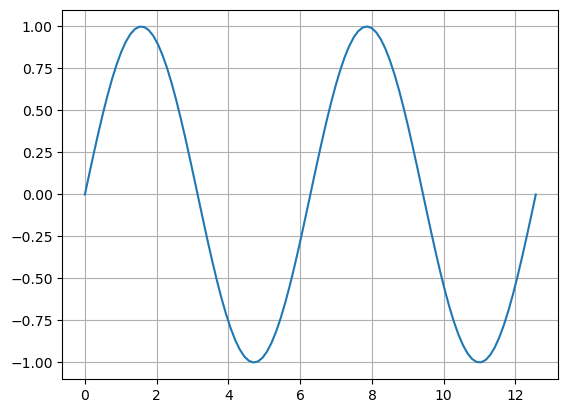

In [3]:
m = 1;
c = 0;
k = 1;
F = lambda t: 0
t = np.linspace(0, 4*np.pi, 100)
u0 = [0, 1]
y = mass_spring_damper(m, c, k, F, u0, t)
plt.plot(t,y), plt.grid(True)
plt.show()

Resonance occures when there is no damping i.e. $c = 0$ and the forcing frequency matches the natural frequency  $\omega_n = \sqrt{k/m}$

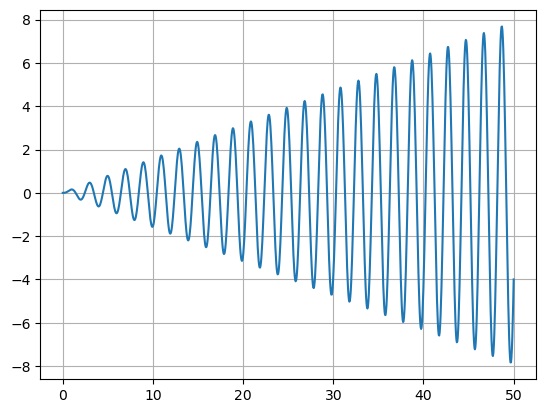

In [4]:
m = 1;
c = 0;
k = 10;
F = lambda t: np.sin(10**0.5*t)
t = np.linspace(0,50,1000)
u0 = [0,0]
y = mass_spring_damper(m,c,k,F,u0,t)
plt.plot(t,y), plt.grid(True)
plt.show()

Beats describes the behaviour of an undamped  system $c = 0$ when the forcing frequency is near but not equal to the natural frequency $\omega_n = \sqrt{k/m}$

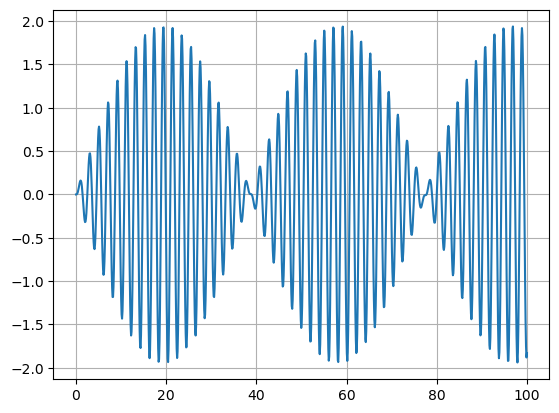

In [5]:
m = 1;
c = 0;
k = 10;
F = lambda t: np.sin(3*t)
t = np.linspace(0,100,1000)
u0 = [0,0]
y = mass_spring_damper(m,c,k,F,u0,t)
plt.plot(t,y), plt.grid(True)
plt.show()

In a damped system $c \neq 0$ there cannot be resonance however there is a forcing frequency which produces the largest steady state amplitude. This frequency is called the damped natural frequency (or practical resonance)

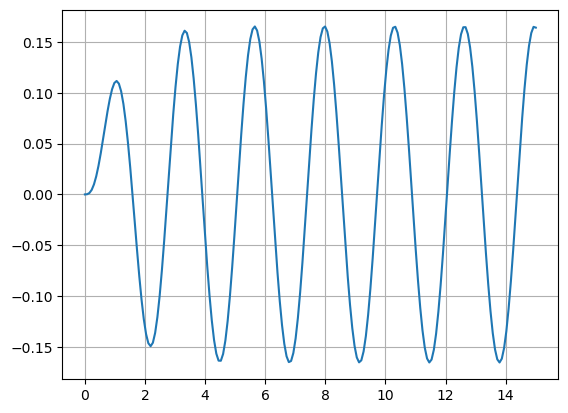

In [6]:
m = 1;
c = 2;
k = 10;
F = lambda t: np.sin(2.7*t)
t = np.linspace(0,15,200)
u0 = [0,0]
y = mass_spring_damper(m,c,k,F,u0,t)
plt.plot(t,y), plt.grid(True)
plt.show()

## Planetary System

The force of gravity between object of mass $M$ and object of mass $m$ is given by:
\begin{equation}
F = \frac{GMm}{d^2}_\odot
\end{equation}

where $d$ is the distance between the two objects.

Consider the case of a planet's trajectory around its parent star. This is a two body problem.

Let's use the units of solar mass, years and astronomical units; we can then apply Kepler's third  law $T^2 \propto  r^3$ to get the value of G.
\begin{align}
T^2 =& \Big(\frac{4\pi^2}{GM}\Big) r^3 \\
G =& \Big(\frac{4\pi^2}{M}\Big) \frac{r^3}{T^2} \\
G =& 4\pi^2 \frac{r^3}{MT^2} \\
G =& 4\pi^2 \frac{[AU]^3}{[M_\odot] \cdot [yr]^2} \approx 39.478 \,\, AU^3\cdot yr^{-3}\cdot M_\odot^{-1}
\end{align}

With these units the gravitataional constant G is $4\pi^2$.

Let $\vec{r}=(x, y)$ be the position of the orbiting planet with the star fixed at the origin $(0,0)$ and let the $m_p$ be the mass of the planet and let $m_s$ be the mass of the star.

Starting with Newton's Second Law, we have:
\begin{equation}
m_p \frac{d^2\vec{r}}{dt^2} = \vec{F}
\end{equation}

where $\vec{F}$ is the vector of total force acting on the planet. From Newton's law of gravity:
\begin{equation}
\vec{F} = - \frac{Gm_sm_p}{||\vec{r}||^2} \frac{\vec{r}}{||\vec{r}||} \equiv - \frac{Gm_sm_p}{||\vec{r}||^3} \vec{r}
\end{equation}

where $||\vec{r}|| = \sqrt{x^2 + y^2}$ is the distance between the star and the planet, and $\frac{\vec{r}}{||\vec{r}||}$ is the unit vector pointing in the direction from the planet to the star.

We then obtain a second order ODE:
\begin{equation}
\frac{d^2\vec{r}}{dt^2} = - \frac{Gm_s}{||\vec{r}||^3}\vec{r} \equiv - \frac{Gm_s}{(x^2 + y^2)^{3/2}}\vec{r}
\end{equation}

From which we can obtain a 2-dimensional system of second order differential equations
\begin{align}
\frac{d^2x}{dt^2} = - \frac{Gm_s}{(x^2 + y^2)^{3/2}}x \\
\frac{d^2y}{dt^2} = - \frac{Gm_s}{(x^2 + y^2)^{3/2}}y
\end{align}

The system can then be simplified as a first order system by introducing new variables: $u_0 = x, u_1 = x^\prime, u_2 = y, u_3 = y^\prime$. The system becomes:
\begin{align}
u_o^\prime =& x^\prime = u_1 \\
u_1^\prime =& x^{\prime\prime} = \frac{Gm_s}{(u_0^2 + u_2^2)^{3/2}} u_0 \\
u_2^\prime =& y^\prime = u_3 \\
u_3^\prime =& y^{\prime\prime} = \frac{Gm_s}{(u_0^2 + u_2^2)^{3/2}} u_2
\end{align}

In [13]:
from typing import Callable
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [16]:
def system(u: list, t: NDArray) -> NDArray:
    dudt: NDArray = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = -G*solar_mass*u[0]/(u[0]**2 + u[2]**2)**(3/2)
    dudt[2] = u[3]
    dudt[3] = -G*solar_mass*u[2]/(u[0]**2 + u[2]**2)**(3/2)

    return dudt

for a star of mass $m_s = 1$, and initial conditions $x(0) = 1, x^\prime(0) = 0, y(0) = 0, y^\prime(0) = 7$:

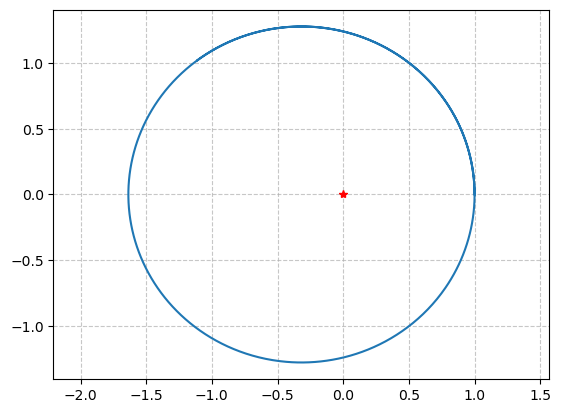

In [26]:
G: float = 4 * np.pi**2
solar_mass: float = 1

init_conditions: list = [1, 0, 0, 7]

t: NDArray = np.linspace(0, 2, 1000)
U: NDArray = spi.odeint(system, init_conditions, t)

plt.plot(U[:,0] ,U[:,2], 0, 0, 'r*')
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Euler's 3-Body Problem

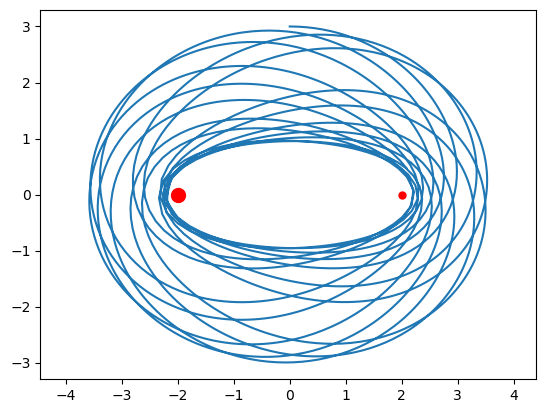

In [19]:
G = 4*np.pi**2 # Gravitational constant
S1 = [-2,0] # Coordinates of Star 1
S2 = [2,0] # Coordinates of Star 2
M1 = 2 # Mass of Star 1 (in solar mass)
M2 = 1 # Mass of Star 2 (in solar mass)

def f(u,t):
    d1 = np.linalg.norm([u[0] - S1[0],u[2] - S1[1]])
    d2 = np.linalg.norm([u[0] - S2[0],u[2] - S2[1]])
    dudt = [0,0,0,0]
    dudt[0] = u[1]
    dudt[1] = -G*M1*(u[0] - S1[0])/d1**3 - G*M2*(u[0] - S2[0])/d2**3
    dudt[2] = u[3]
    dudt[3] = -G*M1*(u[2] - S1[1])/d1**3 - G*M2*(u[2] - S2[1])/d2**3
    return dudt

u0 = [0,5,3,0] # Initial conditions of the planet: [xposition,xvelocity,yposition,yvelocity]
t = np.linspace(0,30,2000) # Array of time values (in years)
u = spi.odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
plt.axis('equal')
plt.show()

In [20]:
def euler3body(S1,S2,M1,M2,u0,tf,numpoints=1000):

    # Define the vector function on the right side of the system of the equations
    def f(u,t):
        d1 = np.linalg.norm([u[0]-S1[0],u[2]-S1[1]])
        d2 = np.linalg.norm([u[0]-S2[0],u[2]-S2[1]])
        dudt = [0,0,0,0]
        dudt[0] = u[1]
        dudt[1] = -G*M1*(u[0]-S1[0])/d1**3 - G*M2*(u[0]-S2[0])/d2**3
        dudt[2] = u[3]
        dudt[3] = -G*M1*(u[2]-S1[1])/d1**3 - G*M2*(u[2]-S2[1])/d2**3
        return dudt

    t = np.linspace(0,tf,numpoints) # Array of time values (in years)
    u = spi.odeint(f,u0,t) # Solve system: u = [xposition,xvelocity,yposition,yvelocity]

    plt.plot(u[:,0],u[:,2]) # Plot trajectory of the planet
    plt.plot(S1[0],S1[1],'ro',markersize=5*M1) # Plot Star 1 as a red star
    plt.plot(S2[0],S2[1],'ro',markersize=5*M2) # Plot Star 2 as a red star
    plt.axis('equal')
    plt.show()

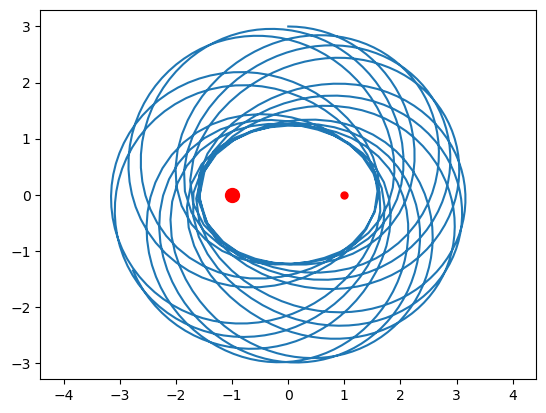

In [21]:
euler3body([-1,0],[1,0],2,1,[0,5,3,0],30)


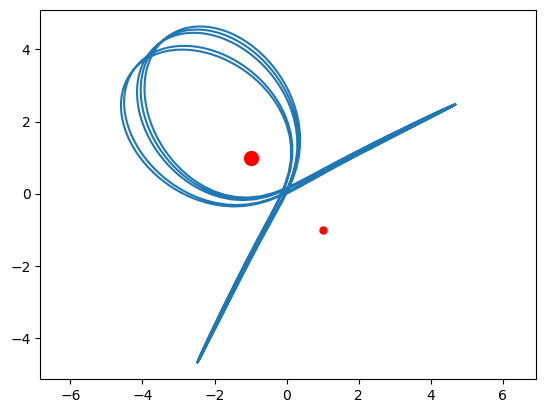

In [22]:
euler3body([-1,1],[1,-1],2,1,[0,10,0,5],30)


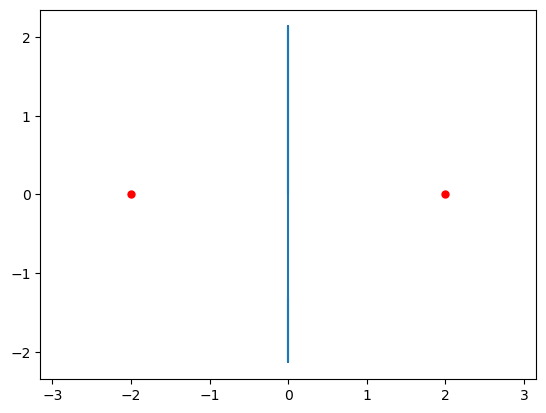

In [23]:
euler3body([-2,0],[2,0],1,1,[0,0,0,5],5)


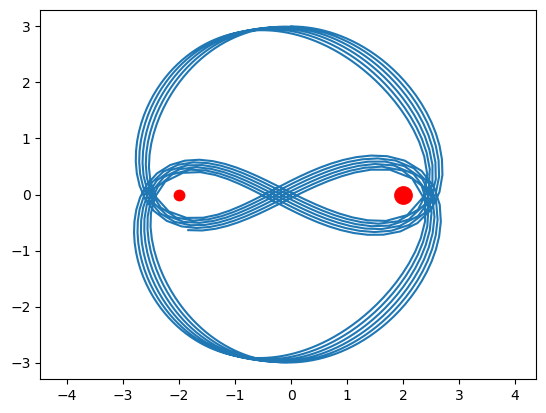

In [24]:
euler3body([-2,0],[2,0],1.5,2.5,[0,4.8,3,0],20)


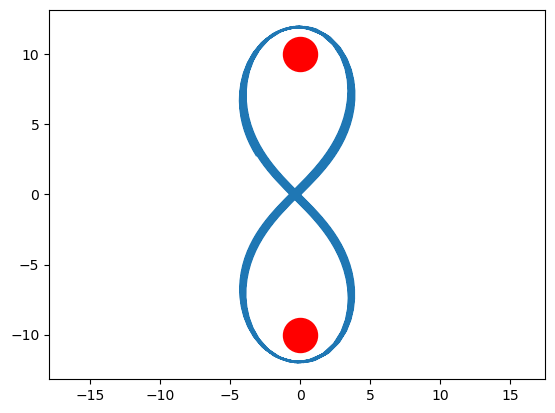

In [25]:
euler3body([0,10],[0,-10],4.9,4.9,[0,np.pi,0,np.pi],100)
